In [1]:
# import libraries
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import display, Math
from sympy.physics.mechanics import init_vprinting, vlatex

In [2]:
#sym.init_printing()

## Kinematics using Lagrangian Approach
Generalized coordinates are: $[\theta(t),\; s(t)]$.
Here our approach will be to use contrain(fixed coupler length) to solve the problem.

In [3]:
# define variables for the problem
# k_r = radius of gyration of link 2
t,lag,k,m2,kr,kr3,m3,m4,l2,a,l3,ev,f1,cd,cd2,p,A,theta,If = sym.symbols('t,\mathcal{L},k,m_2,k_r,k_{r3},m_3,m_4,l2,a,l3,e_v,f_1,c_d,c_{d2},p,A,theta,I_{f}')
ma = m3*(l3-a)/l3; 
mb = m3*a/l3; # ma and mb are apportioned coupler mass

display(Math('m_a = '+ sym.latex(ma)))
display(Math('m_b = '+ sym.latex(mb)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

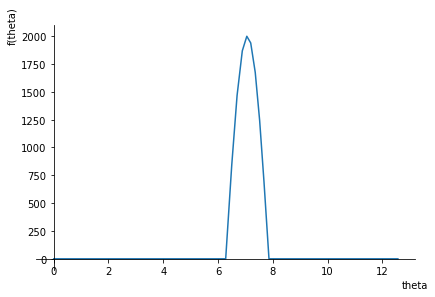

In [4]:
pres = sym.Piecewise( 
    (2e3*sym.sin(2*theta), (2*sym.pi<=theta)&(theta<=2*sym.pi+1.55)),
    (0, True))

display(Math('p = '+ sym.latex(pres)))
fig = sym.plotting.plot(pres,(theta,0,4*sym.pi))

In [5]:
# theta and s_d are fuctions of time
theta = sym.Function('theta')(t)
sd = sym.Function('s_d')(t)
co = sym.Function('c_o')(theta,sd) # constraint function

In [6]:
v1 = sym.diff(theta,t)
v2 = sym.diff(sd,t)

zf = (l2*sym.cos(theta)-sd)**2+(l2*sym.sin(theta)-ev)**2

display(Math('v_1 = '+ sym.latex(v1)))
display(Math('v_2 = '+ sym.latex(v2)))
display(Math('z_f = '+ vlatex(zf)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# define some useful array to be used later
a1 = sym.Array([theta,sd])
b1 = sym.Array([sym.diff(a1[0],t), sym.diff(a1[1],t)])
c1 = sym.Array([sym.diff(b1[0],t), sym.diff(b1[1],t)])
d1 = sym.Array([sym.diff(co,a1[0]), sym.diff(co,a1[1])])
e1 = sym.Array([sym.diff(zf,a1[0]), sym.diff(zf,a1[1])])
tau = -cd2*b1[0]

display(Math('a_1 = '+ vlatex(a1)))
display(Math('b_1 = '+ vlatex(b1)))
display(Math('c_1 = '+ vlatex(c1)))
display(Math('d_1 = '+ vlatex(d1)))
display(Math('e_1 = '+ vlatex(e1)))
display(Math('\\tau = '+ vlatex(tau)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<font size="3">Define Lagrangian as</font>
\begin{align*}
\mathcal{L} &= T - V\\
T &= \frac{1}{2}m_2k_r^2\dot\theta^2+\frac{1}{2}m_al_2^2\dot\theta^2+\frac{1}{2}(m_4+m_b)\dot s_d^2,\ kinetic\ energy\ of\ the\ system\\
V &= \frac{1}{2}kC^2,\ potential\ energy\ of\ the\ system
\end{align*}

In [8]:
# Define Lagrangian
kinetic = (1/2)*(m2*kr**2+If)*v1**2+(1/2)*ma*l2**2*v1**2+(1/2)*(m4+mb)*v2**2 # kinetic energy of the system
potential = (1/2)*k*co**2 ## potential energy of the system
lag = kinetic - potential
display(Math('T = '+ vlatex(kinetic)))
display(Math('V = '+ vlatex(potential)))
display(Math('\mathcal{L} = '+ vlatex(lag)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
def udef(f,a):
    return sym.diff(f,a)

# Function for taking derivative of a scaler function w.r.t elements of a vector
def mdel(f,a):
    """
    Arguments:
    f : a scaler
    a : a vector w.r.t whose element f is derivated
    """
    return [udef(f,a_i) for a_i in a]

In [10]:
# Equation of Motion for the system
eqn = sym.diff(sym.Array(mdel(lag,b1)),t) - sym.Array(mdel(lag,a1)) - sym.Array([f1,-cd*b1[1]-p*A])
eqn1 = sym.Eq(eqn[0],0)
eqn2 = sym.Eq(eqn[1],0)
print('The equations of motion are:')
display(Math('\\theta: '+ vlatex(eqn1)))
display(Math('s_d: '+ vlatex(eqn2)))

The equations of motion are:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
eqarr = sym.Array([sym.Eq(eq,0) for eq in eqn])
display(Math(vlatex(eqarr)))

<IPython.core.display.Math object>

## Numerical Solution:

<font size='3'>First find $\ddot \theta(t)$ and $\ddot s_d(t)$ by solving the above system of linear equations

In [12]:
d2w = sym.Array(sym.linsolve(eqarr,c1))[0]
display(Math('d2w: '+ vlatex(d2w)))

<IPython.core.display.Math object>

<font size='3'>Solution contain $\frac{dC}{d\theta}$ and $\frac{dC}{ds}$. But we know,</font>
\begin{align*}
\frac{dC}{d\theta} &= \frac{1}{2l_3}\frac{dz_f}{d\theta}\\
\frac{dC}{ds} &= \frac{1}{2l_3}\frac{dz_f}{ds}
\end{align*}
<font size='3'>Substitute these values.</font>

In [13]:
d2w1 = d2w.subs([(d1[0],e1[0]/(2*l3)),(d1[1],e1[1]/(2*l3))])
display(Math('d2w1: '+ vlatex(d2w1)))

<IPython.core.display.Math object>

<font size="3">Determination of values of $kC$, the constrain force</font>
\begin{align*}
C(\theta,s) &= \sqrt z-l_3\\
\dot C(\theta,s) &= \frac{1}{2\sqrt z }(\frac{\partial z}{\partial\theta}\dot\theta+\frac{\partial z}{\partial s}\dot s)\\
\ddot C(\theta,s) &= \frac{\partial z}{\partial\theta}\dot\theta+\frac{\partial z}{\partial s}\dot s+\frac{\partial^2 z}{\partial\theta^2}\dot\theta^2+2\frac{\partial^2 z}{\partial\theta \partial s}\dot\theta\dot s+\frac{\partial^2 z}{\partial s^2}\dot s^2
\end{align*}

In [14]:
# ceq is the double time-derivative of the constrain
ceq = sym.diff(zf,theta)*c1[0]+sym.diff(zf,sd)*c1[1]+sym.diff(zf,[theta,2])*b1[0]**2+2*sym.diff(sym.diff(zf,theta),sd)*b1[0]*b1[1]+sym.diff(zf,[sd,2])*b1[1]**2
display(Math('\ddot C = '+ vlatex(ceq)))

<IPython.core.display.Math object>

In [15]:
# substitue \ddot\theta and \ddot s in ceq
ceq1 = ceq.subs([(c1[0],d2w1[0]),(c1[1],d2w1[1])])
display(Math('ceq1 = '+ vlatex(ceq1)))

<IPython.core.display.Math object>

In [16]:
# solve for k in kC
kv = sym.solve(ceq1,k)[0]
display(Math('k = '+ vlatex(kv)))

<IPython.core.display.Math object>

In [17]:
# substitute kv in d2w1 array
d2w2 = d2w1.subs(k,kv)
display(Math('d2w2 = '+ vlatex(d2w2)))

<IPython.core.display.Math object>

<font size='3'>Now we have $\ddot\theta(t)$ and $\ddot s(t)$ in terms of $\theta,\dot\theta,s,\dot s$ only, after eliminating the constrain.To solve the second order differential equations, we define the array of state variables as</font>
\begin{align*}
zarr&=
\begin{bmatrix}
z_1(t) & z_2(t) & z_3(t) & z_4(t)
\end{bmatrix}^{T}
\end{align*}
<font size='3'>where $z_1=\theta,\; z_2=s,\; z_3=\dot\theta,\; z_4=\dot s$</font>

In [18]:
# Now we define z matrix to convert the second order odes to first order odes
zarr = sym.Array([sym.Function('z1')(t),sym.Function('z2')(t),sym.Function('z3')(t),sym.Function('z4')(t)])
d1zarr = sym.diff(zarr,t)
display(Math('zarr = '+ sym.latex(zarr)))
display(Math('d1zarr = '+ vlatex(d1zarr)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [19]:
# substitue z values in the solved accelarations

# first replace velocities and then coordinates
nd2w = d2w2.subs([(b1[0],zarr[2]),(b1[1],zarr[3]),(a1[0],zarr[0]),(a1[1],zarr[1])]) 

display(Math('nd2w = '+ vlatex(nd2w)))

<IPython.core.display.Math object>

<font size='3'>Next we define the rhs of the system of differential equation as:</font>
\begin{align*}
rhs &=
\begin{bmatrix}
z_3(t) & z_4(t) & \ddot\theta(t) & \ddot s(t)
\end{bmatrix}^{T}
\end{align*}

In [20]:
rhs = sym.Array([zarr[2],zarr[3],nd2w[0],nd2w[1]])
display(Math('rhs = '+ vlatex(rhs)))

<IPython.core.display.Math object>

In [21]:
# Define array to replace variables for solving the eqn.
varr = [(m2,0.4),(m3,0.75),(m4,0.8),(l2,0.04),(l3,0.14),(a,0.07),(kr,0.023),(kr3,0.04),(f1,0.2),(cd,5),(ev,0),(A,0.05),(If,0)]
varr

[(m_2, 0.4),
 (m_3, 0.75),
 (m_4, 0.8),
 (l2, 0.04),
 (l3, 0.14),
 (a, 0.07),
 (k_r, 0.023),
 (k_{r3}, 0.04),
 (f_1, 0.2),
 (c_d, 5),
 (e_v, 0),
 (A, 0.05),
 (I_{f}, 0)]

In [22]:
rhs.subs(varr).subs(p,0)

[z3(t), z4(t), -4400.4787720904*(-0.08*(-z2(t) + 0.04*cos(z1(t)))*sin(z1(t)) + 0.0032*sin(z1(t))*cos(z1(t)))*(7.4764592e-7*z2(t)*z3(t)**2*cos(z1(t)) - 7.95368e-5*z2(t)*z4(t) + 0.00018424*z2(t)*sin(z1(t)) + 1.49529184e-6*z3(t)*z4(t)*sin(z1(t)) + 1.8691148e-5*z4(t)**2 + 3.181472e-6*z4(t)*cos(z1(t)))/(0.0002632*z2(t)**2*sin(z1(t))**2 + 0.000113624*z2(t)**2 - 9.08992e-6*z2(t)*cos(z1(t)) + 1.817984e-7*cos(z1(t))**2) + 246.426811237063, -3.03951367781155*(2*z2(t) - 0.08*cos(z1(t)))*(7.4764592e-7*z2(t)*z3(t)**2*cos(z1(t)) - 7.95368e-5*z2(t)*z4(t) + 0.00018424*z2(t)*sin(z1(t)) + 1.49529184e-6*z3(t)*z4(t)*sin(z1(t)) + 1.8691148e-5*z4(t)**2 + 3.181472e-6*z4(t)*cos(z1(t)))/(0.0002632*z2(t)**2*sin(z1(t))**2 + 0.000113624*z2(t)**2 - 9.08992e-6*z2(t)*cos(z1(t)) + 1.817984e-7*cos(z1(t))**2) - 4.25531914893617*z4(t)]

In [23]:
def dydt(zz,tval):
    if (zz[0]%(4*np.pi) >= (2*np.pi)) and (zz[0]%(4*np.pi) <= (2*np.pi)+1.55):
        temp = rhs.subs(varr).subs(p,2e3*sym.sin(2*(zz[0]%(4*np.pi)))) # substitue pressure values at correct interval
        return temp.subs([(zarr[0],zz[0]),(zarr[1],zz[1]),(zarr[2],zz[2]),(zarr[3],zz[3]),(t,tval)])
    else:
        temp = rhs.subs(varr).subs(p,0)
        return temp.subs([(zarr[0],zz[0]),(zarr[1],zz[1]),(zarr[2],zz[2]),(zarr[3],zz[3]),(t,tval)])

<font size='3'>Define the time steps over which to solve the equations and and define the initian conditions, i.e.</font>
\begin{align*}
y_{init} &= [z_1(0),z_2(0),z_3(0),z_4(0)]\\
&= [\theta(0),s(0),\dot\theta(0),\dot s(0)]
\end{align*}

In [24]:
n_steps = 400
tout = np.linspace(0,2,n_steps)
#yinit = [np.pi/2,(sym.sqrt(l3**2-(l2-ev)**2)).subs(varr),0,0]
yinit = [1e-5,(l2+l3).subs(varr),0,0]
yinit

[1e-05, 0.180000000000000, 0, 0]

In [25]:
sol = odeint(dydt,yinit,tout)
for i in range(n_steps):
    sol[i,0] = sol[i,0]%(4*np.pi)
sol

array([[ 1.00000000e-05,  1.80000000e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 3.10577157e-03,  1.79999752e-01,  1.23519452e+00,
        -1.97282599e-04],
       [ 1.23917060e-02,  1.79996051e-01,  2.46956260e+00,
        -1.57374730e-03],
       ...,
       [ 1.20942343e+01,  1.74429924e-01,  1.34373163e+02,
         3.07181304e+00],
       [ 3.41520395e-01,  1.77040300e-01,  1.49900206e+02,
        -2.55134291e+00],
       [ 9.39877755e-01,  1.59811297e-01,  1.01069629e+02,
        -3.82998164e+00]])

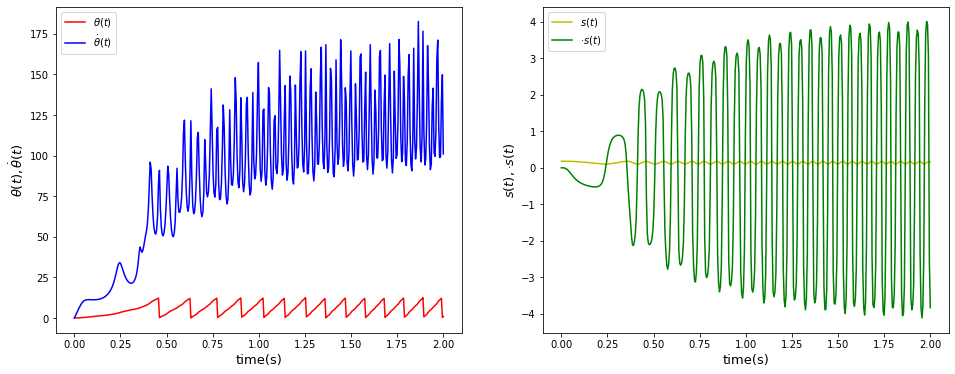

In [26]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(tout,sol[:,0],'r', label=r'$\theta(t)$')
plt.plot(tout,sol[:,2],'b', label=r'$\dot\theta(t)$')
plt.xlabel('time(s)', fontsize=13)
plt.ylabel(r'$\theta(t), \dot\theta(t)$', fontsize=13)
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(tout,sol[:,1],'y', label=r'$s(t)$')
plt.plot(tout,sol[:,3],'g', label=r'$\dot s(t)$')
plt.xlabel('time(s)', fontsize=13)
plt.ylabel(r'$s(t), \dot s(t)$', fontsize=13)
plt.legend(loc='best')
plt.show()

## Check For Constrain Satisfaction:

In [27]:
# substitute z values in place of physical coordinate in z_f
zfa = (zf.subs(varr)).subs([(b1[0],zarr[2]),(b1[1],zarr[3]),(a1[0],zarr[0]),(a1[1],zarr[1])])
zfa

(-z2(t) + 0.04*cos(z1(t)))**2 + 0.0016*sin(z1(t))**2

In [28]:
# calculate pressure values for different crank angle i.e. at every time step
parr = []
for i in range(n_steps):
    if sol[i,0]>=2*sym.pi and sol[i,0]<=2*sym.pi+1.64:
        parr.append(5e3*sym.sin(2*sol[i,0]))
    else:
        parr.append(0)
        
parr

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 218.316399085929,
 2287.91265435733,
 3872.61647043117,
 4811.07778571794,
 4941.73540502307,
 4092.80313742789,
 2247.01273945102,
 -290.187084347521,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 712.868969846914,
 4131.91322994930,
 4981.43686508040,
 3708.06354525319,
 849.252976150476,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3484.46744731722,
 4994.90701978620,
 3487.69785436256,
 51.4984118383545,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4291.04047444207,
 4712.98570859305,
 2021.43979189335,
 0,
 0,
 0,

In [29]:
# create a substitution array, get values of z1,z2,z3,z4 at different time instants
subarr = [[(zarr[j],sol[i,j]) for j in range(4)] for i in range(n_steps)]

<font size='3'>The constrain fiction is defined as</font>
\begin{align*}
C(\theta,s) &= \sqrt z-l_3
\end{align*}

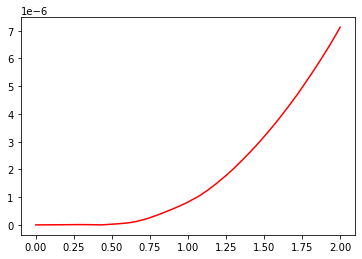

In [30]:
# constrained array, gives value of constrain fuction at different time steps
coarr = [(sym.sqrt(zfa).subs(subarr[i])-l3.subs(varr)) for i in range(n_steps)]

plt.plot(tout,np.abs(coarr),'r')
plt.show()

## Find Constrain Force:

<IPython.core.display.Math object>

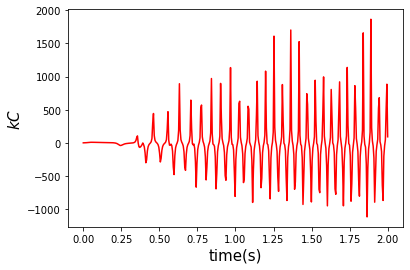

In [31]:
# constrained force
intf = ((kv*co).subs(varr)).subs([(b1[0],zarr[2]),(b1[1],zarr[3]),(a1[0],zarr[0]),(a1[1],zarr[1])])
intfarr = [(intf.subs(p,parr[i]).subs(subarr[i])) for i in range(n_steps)]

display(Math('intf = '+ vlatex(intf)))

plt.plot(tout,intfarr,'r')
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$kC$', fontsize=15)
plt.show()

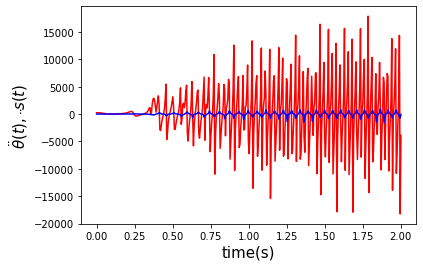

In [32]:
angaccarr = [((rhs[2].subs(varr)).subs(p,parr[i]).subs(subarr[i])) for i in range(n_steps)]
slideraccarr = [((rhs[3].subs(varr)).subs(p,parr[i]).subs(subarr[i])) for i in range(n_steps)]

plt.plot(tout,angaccarr,'r',tout,slideraccarr,'b')
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$\ddot\theta(t),\ddot s(t)$', fontsize=15)
plt.show()

In [33]:
# zarr2 contains derivative of zarr
zarr2 = sym.Array([sym.Function('z5')(t),sym.Function('z6')(t),sym.Function('z7')(t),sym.Function('z8')(t)])
display(Math('zarr2 = '+ sym.latex(zarr2)))

<IPython.core.display.Math object>

In [34]:
rhsv = np.array([(rhs.subs(varr)).subs(p,parr[i]).subs(subarr[i]) for i in range(n_steps)])

# full sunbstitution array [zarr;zarr2]
fullarr = [[(zarr[j],sol[i,j]) for j in range(4)] + [(zarr2[j],rhsv[i,j]) for j in range(4)] for i in range(n_steps)]

## Ground Reaction Force Calculation

<font size='3'>To determine the ground reaction forces we apply Newton-Eular Laws of motion on the whole chain. The equation of motions are
\begin{align*}
m_2\ddot{\vec r_{G2}}+ma\ddot{\vec r_{a}}+(m4+m_b)\ddot{\vec r_{a}} &= (Ox+f-pA)\hat i+(Oy+N)\hat j\\~\\
(I_{o2}+m_al_2^2)\ddot\theta-(I_{G3}-ma(l_3-a))\ddot\phi&=\tau+sN
\end{align*}</font>

In [35]:
rho2,Ox,Oy,N = sym.symbols('rho_2,O_x,O_y,N')
pG2 = rho2*sym.Array([sym.cos(theta),sym.sin(theta)])
pa = l2*sym.Array([sym.cos(theta),sym.sin(theta)])
ps = sym.Array([sd,ev])

display(Math('\\rho_{G2} = '+ vlatex(pG2)))
display(Math('\\rho_{a} = '+ vlatex(pa)))
display(Math('\\rho_s = '+ vlatex(ps)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [36]:
apG2 = sym.diff(pG2,[t,2])
apa = sym.diff(pa,[t,2])
aps = sym.diff(ps,[t,2])

display(Math('a_{G2} = '+ vlatex(apG2)))
display(Math('a_{a} = '+ vlatex(apa)))
display(Math('a_s = '+ vlatex(aps)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [37]:
teqn = (m2*apG2+ma*apa+(m4+mb)*aps-sym.Array([Ox-cd*b1[1]-p*A,Oy+N]))
display(Math('teqn = '+ vlatex(teqn)))

teqn = (m2*apG2+ma*apa+(m4+mb)*aps-sym.Array([Ox-cd*b1[1]-p*A,Oy+N])).subs([(b1[0],zarr[2]),(b1[1],zarr[3]),(a1[0],zarr[0]),(a1[1],zarr[1])])
display(Math('teqn = '+ vlatex(teqn)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [38]:
ps3d = sym.Array(np.append(ps,sym.Array([0])))
pa3d = sym.Array(np.append(pa,sym.Array([0])))
d1ps3d = sym.diff(ps3d,t)
d1pa3d = sym.diff(pa3d,t)

phi = sym.asin(l2*sym.sin(theta)/l3)
d1phi = sym.diff(phi,t)

Ho = (m2*kr**2*b1[0]+np.cross(pa3d,ma*d1pa3d)[2]+np.cross(ps3d,(m4+mb)*d1ps3d)[2]-(m3*kr3**2-m3*a*(l3-a))*d1phi)
reqn = (sym.diff(Ho,t)-f1-sd*N+ev*cd*b1[1]).subs([(b1[0],zarr[2]),(b1[1],zarr[3]),(a1[0],zarr[0]),(a1[1],zarr[1])])


display(Math('\phi = '+ vlatex(phi)))
display(Math('\dot\phi = '+ vlatex(d1phi)))
display(Math('H_o = '+ vlatex(Ho)))
display(Math('reqn = '+ vlatex(reqn)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [39]:
teqnarr = sym.Array([sym.Eq(teqn[i],0) for i in range(len(teqn))])
reqn = sym.Eq(reqn,0)

display(Math('teqnarr : '+ vlatex(teqnarr)))
display(Math('reqn : '+ vlatex(reqn)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [40]:
# Solve for the normal reaction forces from the rotational equation of motion
normal = sym.solve(reqn,N)[0]

display(Math(vlatex(normal)))

<IPython.core.display.Math object>

In [41]:
normalarr = [normal.subs(varr).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])])]
display(Math(vlatex(normalarr)))

<IPython.core.display.Math object>

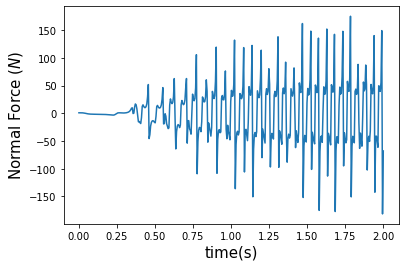

In [42]:
# Get the values of normal forces at different time instants.
normalarr = [normal.subs(varr).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(fullarr[i]) for i in range(n_steps)]

plt.plot(tout,normalarr)
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'Normal Force $(N)$', fontsize=15)
plt.show()

In [43]:
# Solve for Ox,Oy from the translational equations of motion
ground_force = sym.Array(sym.linsolve(teqnarr,[Ox,Oy]))[0]
display(Math(vlatex(ground_force)))

<IPython.core.display.Math object>

In [44]:
varr.append((rho2,0.025))
varr

[(m_2, 0.4),
 (m_3, 0.75),
 (m_4, 0.8),
 (l2, 0.04),
 (l3, 0.14),
 (a, 0.07),
 (k_r, 0.023),
 (k_{r3}, 0.04),
 (f_1, 0.2),
 (c_d, 5),
 (e_v, 0),
 (A, 0.05),
 (I_{f}, 0),
 (rho_2, 0.025)]

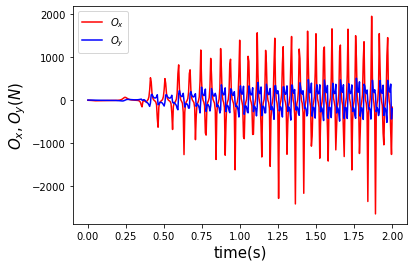

In [45]:
# Get the values of Ox,Oy at different time instants.
ground_force_arr = [ground_force.subs(varr).subs(p,parr[i]).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(N,normalarr[i]).subs(fullarr[i]) for i in range(n_steps)]

plt.plot(tout,np.array(ground_force_arr)[:,0],'r', label=r'$O_x$')
plt.plot(tout,np.array(ground_force_arr)[:,1],'b', label=r'$O_y$')
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$O_x, O_y (N)$', fontsize=15)
plt.legend()
plt.show()

## Check for the Holding Forces on the Engine Support

<font size='3'>We have the net holding forces on the engine as</font>
\begin{align*}
F_x &= O_x-c_d\dot s-pA\\
F_y &= O_y+N\\
M_z &= sN
\end{align*}

In [46]:
Fx = ground_force[0]-cd*zarr[3]-p*A
Fy = ground_force[1]+normal
Mz = zarr[2]*normal-ev*cd*zarr[3]

display(Math('F_x = '+ vlatex(Fx)))
display(Math('F_y = '+ vlatex(Fy)))
display(Math('M_z = '+ vlatex(Mz)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [47]:
support_force = sym.Array([Fx, Fy])

display(Math('Support\_force : '+ vlatex(support_force)))
display(Math('Support\_moment : '+ vlatex(Mz)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

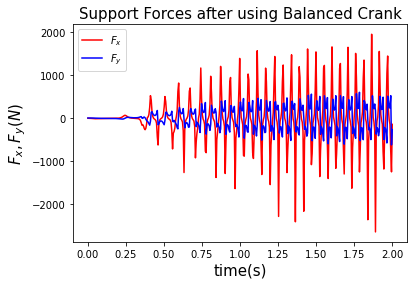

In [48]:
# Get the values of Fx,Fy at different time instants.
support_forcearr = [support_force.subs(varr).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(N,normalarr[i]).subs(fullarr[i]) for i in range(n_steps)]

plt.plot(tout,np.array(support_forcearr)[:,0],'r', label=r'$F_x$')
plt.plot(tout,np.array(support_forcearr)[:,1],'b', label=r'$F_y$')
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$F_x, F_y (N)$', fontsize=15)
plt.title("Support Forces after using Balanced Crank", fontsize=15)
plt.legend()
plt.show()

### Balanced Crank

<font size='3'>For Balanced Crank we take $\rho_2=-\frac{m_3l_2(l_3-1)}{m_2l_3}$</font>

In [49]:
# new value of rho2
nrho2 = -m3*(l3-a)*l2/(m2*l3)

nsupport_force = support_force.subs(rho2,nrho2)
display(Math('support\_force : '+ vlatex(nsupport_force)))

<IPython.core.display.Math object>

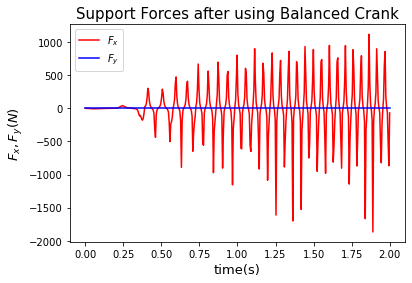

In [50]:
nsupport_forcearr = [nsupport_force.subs(varr).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(N,normalarr[i]).subs(fullarr[i]) for i in range(n_steps)]

plt.plot(tout,np.array(nsupport_forcearr)[:,0],'r', label=r'$F_x$')
plt.plot(tout,np.array(nsupport_forcearr)[:,1],'b', label=r'$F_y$')

plt.title("Support Forces after using Balanced Crank", fontsize=15)
plt.xlabel('time(s)', fontsize=13)
plt.ylabel(r'$F_x, F_y (N)$', fontsize=13)
plt.legend()
plt.show()

### Reciprocating Mass Balance

<font size='3'>For Reciprocating Mass Balance we take $a=-\frac{m_4}{m_3}l_3$</font>

In [51]:
na = -m4*l3/m3

nsupport_force2 = support_force.subs(a,na)
display(Math('support\_force : '+ vlatex(nsupport_force2)))

<IPython.core.display.Math object>

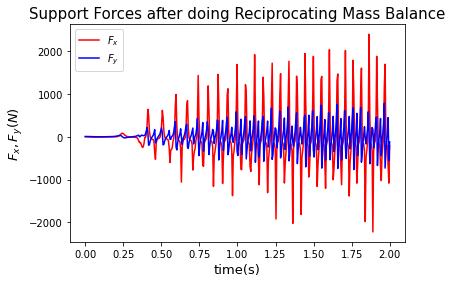

In [52]:
nsupport_forcearr2 = [nsupport_force2.subs(varr).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(N,normalarr[i]).subs(fullarr[i]) for i in range(n_steps)]

plt.plot(tout,np.array(nsupport_forcearr2)[:,0],'r', label=r'$F_x$')
plt.plot(tout,np.array(nsupport_forcearr2)[:,1],'b', label=r'$F_y$')

plt.title("Support Forces after doing Reciprocating Mass Balance", fontsize=15)
plt.xlabel('time(s)', fontsize=13)
plt.ylabel(r'$F_x, F_y (N)$', fontsize=13)
plt.legend()
plt.show()

### Both Balanced Crank and Reciprocating Mass Balance

In [53]:
nsupport_force3 = support_force.subs([(rho2,nrho2),(a,na)])
display(Math('support\_force : '+ vlatex(nsupport_force3)))

<IPython.core.display.Math object>

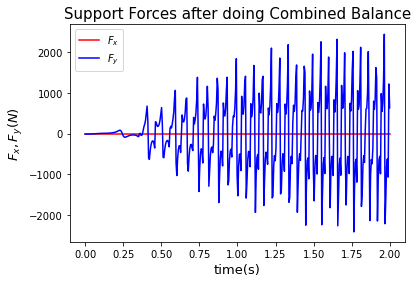

In [54]:
nsupport_forcearr3 = [nsupport_force3.subs(varr).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(N,normalarr[i]).subs(fullarr[i]) for i in range(n_steps)]

plt.plot(tout,np.array(nsupport_forcearr3)[:,0],'r', label=r'$F_x$')
plt.plot(tout,np.array(nsupport_forcearr3)[:,1],'b', label=r'$F_y$')

plt.title("Support Forces after doing Combined Balance", fontsize=15)
plt.xlabel('time(s)', fontsize=13)
plt.ylabel(r'$F_x, F_y (N)$', fontsize=13)
plt.legend()
plt.show()

 ## Balanace of Dynamic Moments

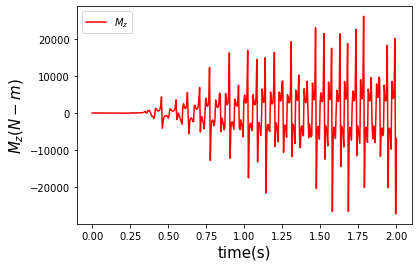

In [55]:
support_moment = [Mz.subs(varr).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(N,normalarr[i]).subs(fullarr[i]) for i in range(n_steps)]

plt.plot(tout,support_moment,'r', label=r'$M_z$')
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$M_z(N-m)$', fontsize=15)
plt.legend()
plt.show()

<font size='3'>For Dynamic Moment Balance we take  $k_{G3}^2=a(l_3-a)$</font>

In [56]:
# center of purcussion property of coupler
nkr3 = sym.sqrt(a*(l3-a))

nMz = Mz.subs(kr3,nkr3)
display(Math('Support\_moment = '+vlatex(nMz)))

<IPython.core.display.Math object>

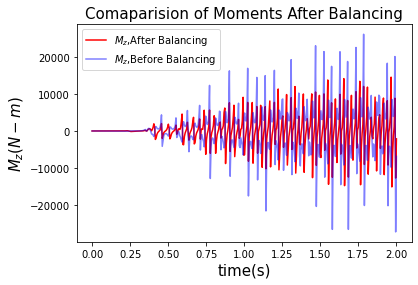

In [57]:
nsupport_moment = [nMz.subs(varr).subs([(d1zarr[0],zarr[2]),(d1zarr[1],zarr[3]),(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(N,normalarr[i]).subs(fullarr[i]) for i in range(n_steps)]

plt.plot(tout,nsupport_moment,'r', label=r'$M_z$,After Balancing')
plt.plot(tout,support_moment,'b', alpha=0.5, label=r'$M_z$,Before Balancing')
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$M_z(N-m)$', fontsize=15)
plt.title('Comaparision of Moments After Balancing', fontsize=15)
plt.legend()
plt.show()

## Performance with Flywheel

In [58]:
varr.pop(-2)
varr

[(m_2, 0.4),
 (m_3, 0.75),
 (m_4, 0.8),
 (l2, 0.04),
 (l3, 0.14),
 (a, 0.07),
 (k_r, 0.023),
 (k_{r3}, 0.04),
 (f_1, 0.2),
 (c_d, 5),
 (e_v, 0),
 (A, 0.05),
 (rho_2, 0.025)]

In [59]:
varr.append((If,0.001))
varr

[(m_2, 0.4),
 (m_3, 0.75),
 (m_4, 0.8),
 (l2, 0.04),
 (l3, 0.14),
 (a, 0.07),
 (k_r, 0.023),
 (k_{r3}, 0.04),
 (f_1, 0.2),
 (c_d, 5),
 (e_v, 0),
 (A, 0.05),
 (rho_2, 0.025),
 (I_{f}, 0.001)]

In [60]:
def dydt(zz,tval):
    if (zz[0]%(4*np.pi) >= (2*np.pi)) and (zz[0]%(4*np.pi) <= (2*np.pi)+1.55):
        temp = rhs.subs(varr).subs(p,2e3*sym.sin(2*(zz[0]%(4*np.pi))))
        return temp.subs([(zarr[0],zz[0]),(zarr[1],zz[1]),(zarr[2],zz[2]),(zarr[3],zz[3]),(t,tval)])
    else:
        temp = rhs.subs(varr).subs(p,0)
        return temp.subs([(zarr[0],zz[0]),(zarr[1],zz[1]),(zarr[2],zz[2]),(zarr[3],zz[3]),(t,tval)])

In [61]:
n_steps = 400
tout = np.linspace(0,2,n_steps)
#yinit = [np.pi/2,(sym.sqrt(l3**2-(l2-ev)**2)).subs(varr),0,0]
yinit = [1e-5,(l2+l3).subs(varr),0,0]
yinit

[1e-05, 0.180000000000000, 0, 0]

In [62]:
solf = odeint(dydt,yinit,tout)
for i in range(n_steps):
    solf[i,0] = solf[i,0]%(4*np.pi)
solf

array([[ 1.00000000e-05,  1.80000000e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 1.39692054e-03,  1.79999949e-01,  5.53380546e-01,
        -3.97434950e-05],
       [ 5.55762631e-03,  1.79999206e-01,  1.10672773e+00,
        -3.16310858e-04],
       ...,
       [ 1.31090614e+00,  1.44839973e-01,  9.21119150e+01,
        -3.83274153e+00],
       [ 1.78072303e+00,  1.26091004e-01,  9.72805927e+01,
        -3.56980105e+00],
       [ 2.30434839e+00,  1.10034029e-01,  1.13195876e+02,
        -2.70493608e+00]])

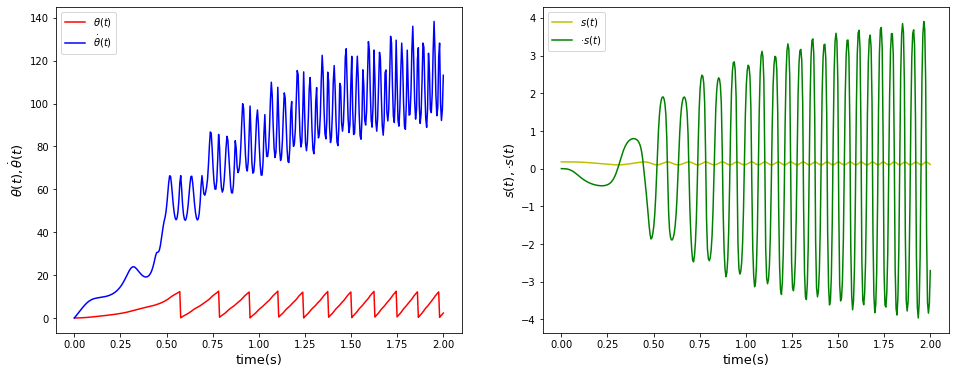

In [63]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(tout,solf[:,0],'r', label=r'$\theta(t)$')
plt.plot(tout,solf[:,2],'b', label=r'$\dot\theta(t)$')
plt.xlabel('time(s)', fontsize=13)
plt.ylabel(r'$\theta(t), \dot\theta(t)$', fontsize=13)
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(tout,solf[:,1],'y', label=r'$s(t)$')
plt.plot(tout,solf[:,3],'g', label=r'$\dot s(t)$')
plt.xlabel('time(s)', fontsize=13)
plt.ylabel(r'$s(t), \dot s(t)$', fontsize=13)
plt.legend(loc='best')
plt.show()

In [64]:
# calculate pressure values for different crank angle i.e. at every time step
parrf = []
for i in range(n_steps):
    if solf[i,0]>=2*sym.pi and solf[i,0]<=2*sym.pi+1.64:
        parrf.append(5e3*sym.sin(2*solf[i,0]))
    else:
        parrf.append(0)

In [65]:
# create a substitution array, get values of z1,z2,z3,z4 at different time instants
subarrf = [[(zarr[j],solf[i,j]) for j in range(4)] for i in range(n_steps)]

In [66]:
angaccarrf = [((rhs[2].subs(varr)).subs(p,parrf[i]).subs(subarrf[i])) for i in range(n_steps)]
slideraccarrf = [((rhs[3].subs(varr)).subs(p,parrf[i]).subs(subarrf[i])) for i in range(n_steps)]

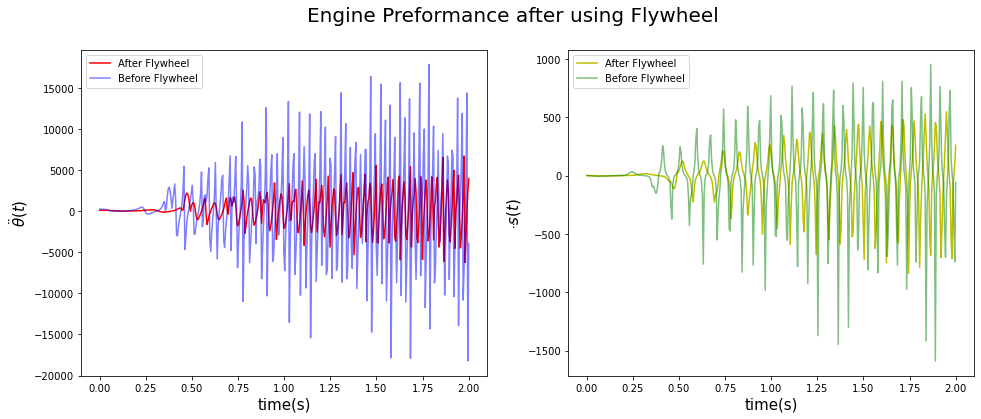

In [67]:
plt.figure(figsize=(16,6))
plt.suptitle("Engine Preformance after using Flywheel", fontsize=20)

plt.subplot(1,2,1)

plt.plot(tout,angaccarrf,'r', label="After Flywheel")
plt.plot(tout,angaccarr,'b', alpha=0.5, label="Before Flywheel")
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$\ddot\theta(t)$', fontsize=15)
plt.legend()


plt.subplot(1,2,2)

plt.plot(tout,slideraccarrf,'y', label="After Flywheel")
plt.plot(tout,slideraccarr,'g', alpha=0.5, label="Before Flywheel")
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$\ddot s(t)$', fontsize=15)
plt.legend()
plt.show()